## Homework 2 ##

Plot both SAR and EAR as a function of the relative area, using the Log Series as the SAD distribution P( n ) = c (1-m)^n / n (c is the normalization constant - see Eq. 3.29) and compare it with a Power Law SAR of exponent z ∊ (0.2,0.3) (S(a)=k A^z) and z, k tuned so the be as close as possible to the solution for the random placement case.

In class I did not perform explicitly the integral (convolution between the average SAR and PNo. It is easy and you find in the notes (Eq. 3.27).

 I did not also explain how to derive the EAR in class, but the derivation is very similar to the SAR and you find it in the notes (Eq. 3.32).

If you remove 1/3 of the area, how many species go extinct? Do the estimation both using the SAR and the EAR.

In the Coleman paper (that you also find in the Moodle) you find the original model where the random placement is presented in full details, not only for the log series distribution but also for other SAD distributions.

$$ P(n) = \frac{(1 - m)^n}{n}\frac{1}{|log(m)|}  \\ c = \frac{1}{|log(m)|} $$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

Percentage of species to go extinct when removing 1/3 of the area: 15.490195998574322 %


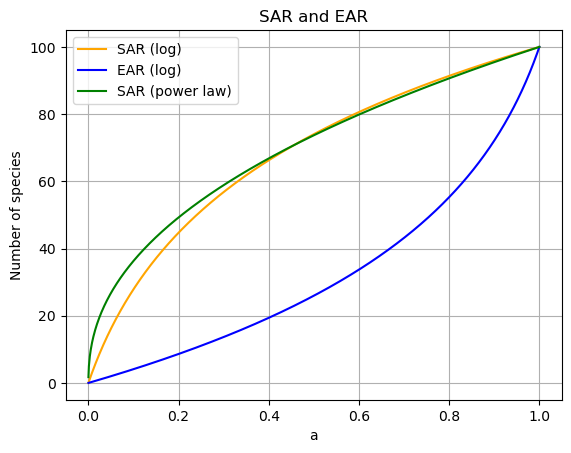

In [111]:
# n: population
# m = b0 (migration rate); m != 1, m > 0
# S: number of species; S > 0, integer
# a: (alpha) -> area fraction 0 <= a <= 1
# z: power law exp; from literature: 0.2<=z>=0.3

m = 0.1 # m < 1 -> convex sar_log ; m > 1 -> concave sar_log
S = 100
z = 0.44 # it is asked to tune it to best fit the sar


def sad(n):
    return ((1 / np.abs(np.log(m)) * pow(1 - m,n)) / n)

def sar_log(a, S, m):
    # From Eq. 3.29
    return S * (1 - (np.log(m * (1 - a) + a)) / np.log(m))

def sar_pw(a, k, z):
    return k * a ** z

def ear_log(a, S, m):
    # see my notes (Homework 2)
    return S * (np.log(1 - (a * (1 - m))) / np.log(m))

        
a_s = np.linspace(0.0001, 1, 1000)

plt.plot(a_s, sar_log(a_s, S, m), color='orange', label='SAR (log)')
plt.plot(a_s, ear_log(a_s, S, m), color='blue', label='EAR (log)')
plt.plot(a_s, sar_pw(a_s, S, z), color='green', label='SAR (power law)')
plt.title('SAR and EAR')
plt.legend()
plt.xlabel('a')
plt.ylabel('Number of species')
plt.grid()


# if you remove 1/3 of the area ...
print("Percentage of species to go extinct when removing 1/3 of the area:", (ear_log(1/3,S,m) / S) * 100,"%")
    